In [3]:
import zipfile
zfp='/content/ais_data.csv.zip'
ztd='/content/Untitled Folder'
with zipfile.ZipFile(zfp, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(ztd)

In [4]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/Untitled Folder/ais_data.csv')
df.head()

,Unnamed: 0,mmsi,navigationalstatus,sog,cog,heading,shiptype,width,length,draught
0,0,219019621,Unknown value,0.0,86.0,86.0,Fishing,4.0,9.0,NaN
1,1,265628170,Unknown value,0.0,334.5,NaN,Port tender,8.0,27.0,NaN
2,2,219005719,Unknown value,0.0,208.7,NaN,Fishing,4.0,11.0,NaN
3,3,219028066,Unknown value,0.0,NaN,NaN,Pleasure,3.0,12.0,NaN
4,4,212584000,Moored,0.0,153.0,106.0,Cargo,13.0,99.0,6.3


In [5]:
#shape of the distribution
df.shape


(358351, 10)

In [6]:
# first unnamed column is not necessary, so remove it
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,mmsi,navigationalstatus,sog,cog,heading,shiptype,width,length,draught
0,219019621,Unknown value,0.0,86.0,86.0,Fishing,4.0,9.0,NaN
1,265628170,Unknown value,0.0,334.5,NaN,Port tender,8.0,27.0,NaN
2,219005719,Unknown value,0.0,208.7,NaN,Fishing,4.0,11.0,NaN
3,219028066,Unknown value,0.0,NaN,NaN,Pleasure,3.0,12.0,NaN
4,212584000,Moored,0.0,153.0,106.0,Cargo,13.0,99.0,6.3


In [7]:
#now check for null values
df.isnull().sum()

mmsi                      0
navigationalstatus        0
sog                     458
cog                    3169
heading               20614
shiptype                  0
width                  3711
length                 3743
draught               25543
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358351 entries, 0 to 358350
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   mmsi                358351 non-null  int64  
 1   navigationalstatus  358351 non-null  object 
 2   sog                 357893 non-null  float64
 3   cog                 355182 non-null  float64
 4   heading             337737 non-null  float64
 5   shiptype            358351 non-null  object 
 6   width               354640 non-null  float64
 7   length              354608 non-null  float64
 8   draught             332808 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 24.6+ MB


EXPLORATORY DATA ANALYSIS

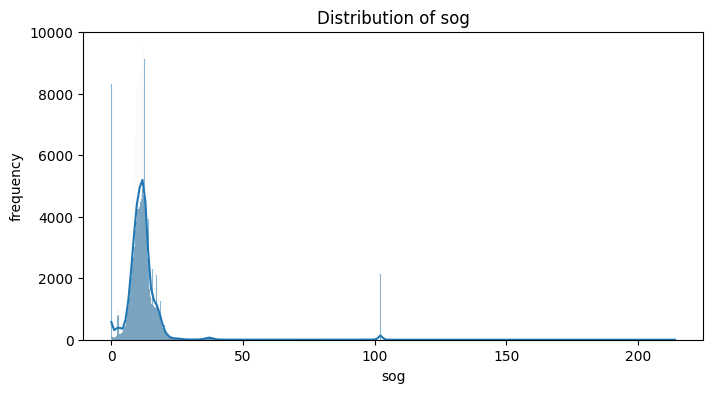

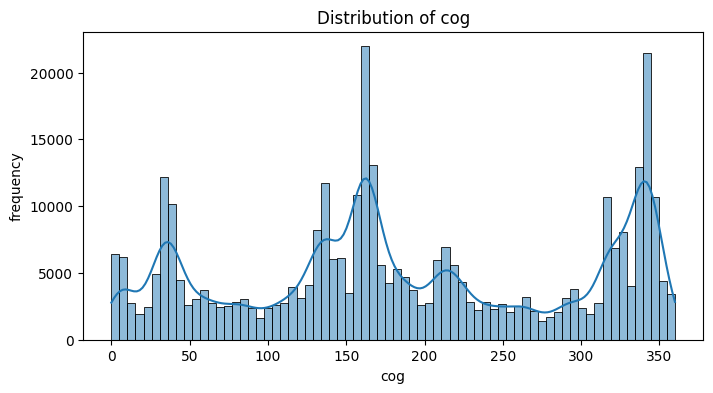

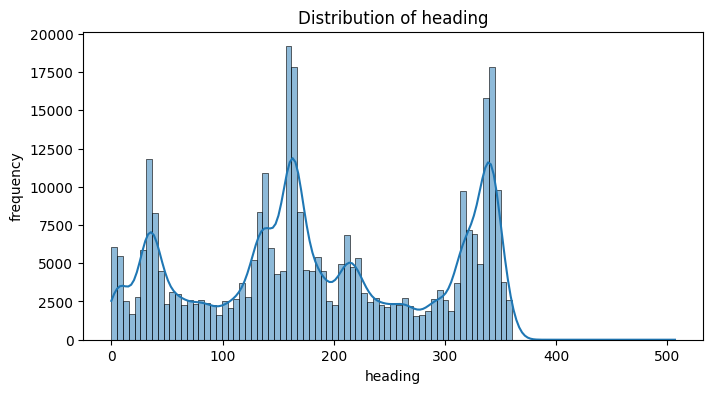

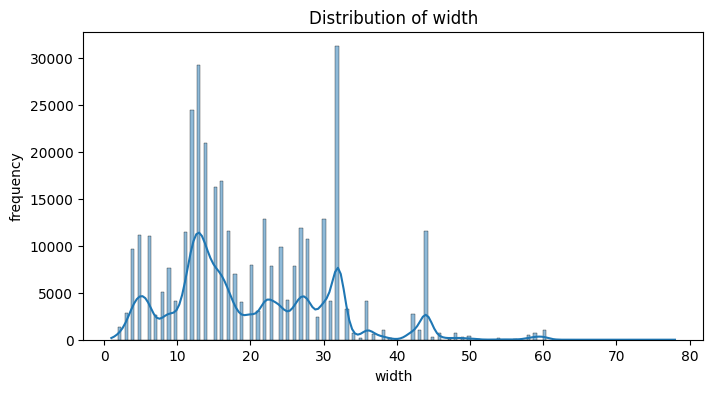

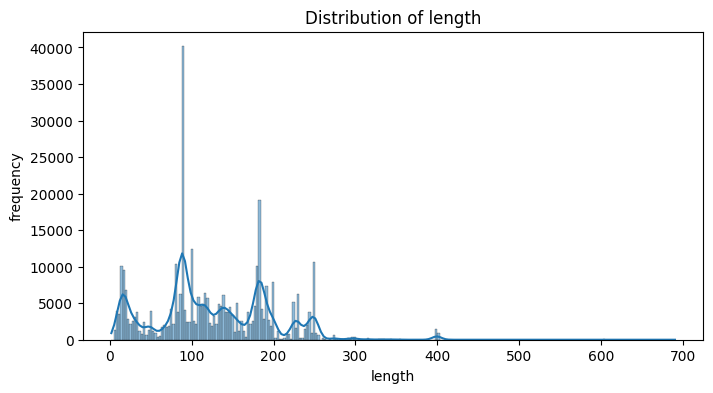

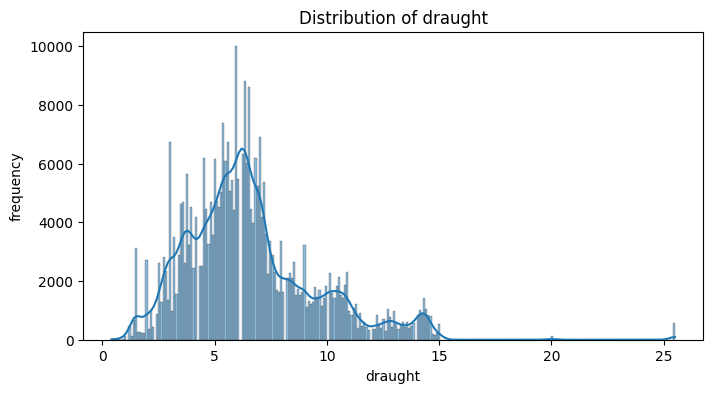

In [9]:
# distribution of numerical variables
import matplotlib.pyplot as plt
import seaborn as sns
num_vars=['sog', 'cog', 'heading', 'width', 'length', 'draught']
for var in num_vars:
  plt.figure(figsize=(8,4))
  sns.histplot(df[var],kde=True)
  plt.title(f'Distribution of {var}')
  plt.xlabel(var)
  plt.ylabel('frequency')
  plt.show()


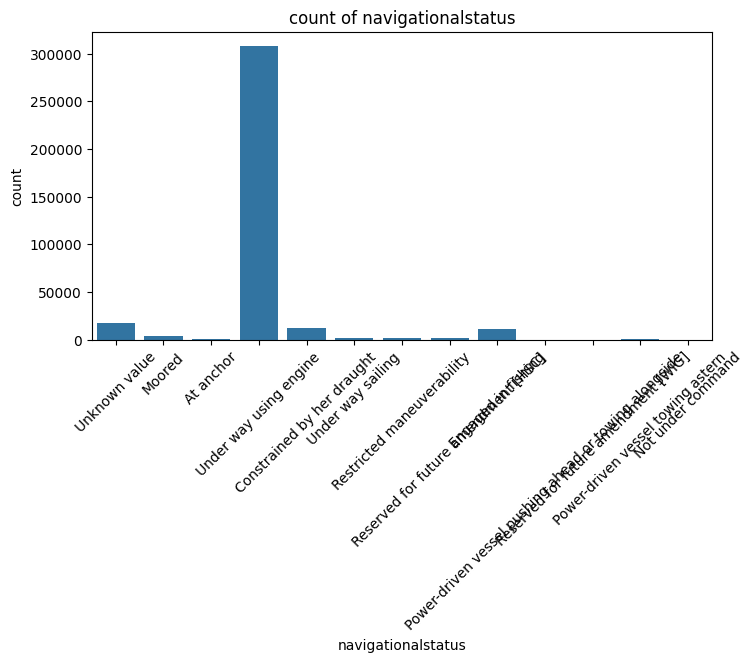

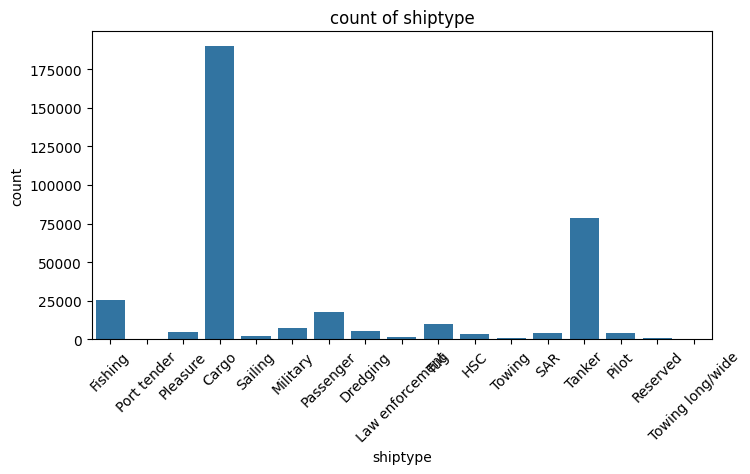

In [10]:
# distribution of categorical variables

cat_vars=['navigationalstatus','shiptype']
for var in cat_vars:
  plt.figure(figsize=(8,4))
  sns.countplot(x=var,data=df)
  plt.title(f'count of {var}')
  plt.xlabel(var)
  plt.ylabel('count')
  plt.xticks(rotation=45)
  plt.show()

<ipython-input-11-0a27deb6db80>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix=df.corr()


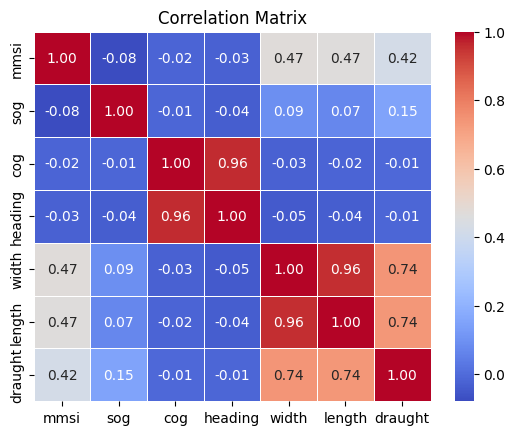

In [11]:
# correlation analysis

cor_matrix=df.corr()
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
pd.DataFrame(df.groupby(['navigationalstatus', 'shiptype']).size()).head(60)

0
navigationalstatus                                 shiptype               
At anchor                                          Cargo               228
                                                   Dredging              9
                                                   Fishing               7
                                                   Law enforcement       1
                                                   Military             11
                                                   Reserved             24
                                                   SAR                   1
                                                   Tanker              212
                                                   Towing               14
                                                   Tug                   6
Constrained by her draught                         Cargo              5338
                                                   Dredging             27
                                                   Reserved             25
                                                   Tanker             6897
Engaged in fishing                                 Dredging              1
                                                   Fishing           10797
Moored                                             Cargo              1213
                                                   Dredging            134
                                                   Fishing             150
                                                   HSC                 155
                                                   Law enforcement      25
                                                   Military            504
                                                   Passenger           288
                                                   Pilot               161
                                                   Pleasure             97
                                                   Port tender          54
                                                   Reserved             81
                                                   SAR                 269
                                                   Sailing              82
                                                   Tanker              369
                                                   Towing               58
                                                   Towing long/wide      2
                                                   Tug                 479
Not under command                                  Cargo                 1
                                                   Fishing              21
                                                   Military              6
                                                   Passenger             1
                                                   Tanker                1
                                                   Tug                   1
Power-driven vessel pushing ahead or towing alo... Cargo                 1
                                                   Tug                 235
Power-driven vessel towing astern                  Pilot               131
                                                   Tug                 246
Reserved for future amendment [HSC]                Fishing             211
                                                   HSC                1661
Reserved for future amendment [WIG]                Fishing              12
Restricted maneuverability                         Cargo                 6
                                                   Dredging            186
                                                   Law enforcement      12
                                                   Military             72
                                                   Pilot                 4
                                                   Reserved             79
                       

In [13]:
# analysis of missing values

def mvt(df):
  counts=df.isnull().sum()
  ratio=counts/len(df)
  table=pd.DataFrame({'missing_values':counts[counts!=0],
                      'missing_ratio':ratio[counts!=0]})

  print(table)

mvt(df)

         missing_values  missing_ratio
sog                 458       0.001278
cog                3169       0.008843
heading           20614       0.057525
width              3711       0.010356
length             3743       0.010445
draught           25543       0.071279


In [14]:
# analysis of outliers

def detect_outliers(data, col, threshold=3):

    q1 = np.percentile(data[col].dropna(), 25)
    q3 = np.percentile(data[col].dropna(), 75)


    iqr = q3 - q1


    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Find the indices of outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index

    return outliers

# Loop through numerical columns and detect outliers
outlier_indices = {}
for col in df.select_dtypes(include=['float64','int64']).columns:
    outliers = detect_outliers(df, col)
    if len(outliers) > 0:
        outlier_indices[col] = outliers

# Print the number of outliers detected for each numerical column
for col, outliers in outlier_indices.items():
    print(f"Number of outliers for '{col}': {len(outliers)}")


Number of outliers for 'mmsi': 24348
Number of outliers for 'sog': 6222
Number of outliers for 'width': 9
Number of outliers for 'length': 47
Number of outliers for 'draught': 709


FEATURE ENGINEERING


In [15]:
# cog and heading are similar,so combine them
df['route']=df['cog'].combine_first(df['heading'])

In [16]:
# missing values of sog
grouped_speed=df.groupby(['shiptype'])['sog'].transform('mean')
filled_speed=df['sog'].fillna(grouped_speed)
df['speed']=filled_speed

In [17]:
df=df.drop_duplicates(subset='mmsi')
df.groupby(['shiptype'])['mmsi'].count()

shiptype
Cargo               1716
Dredging              53
Fishing              325
HSC                   27
Law enforcement       20
Military              79
Passenger            123
Pilot                 41
Pleasure             414
Port tender           12
Reserved              12
SAR                  123
Sailing              215
Tanker               642
Towing                11
Towing long/wide       3
Tug                   78
Name: mmsi, dtype: int64

In [18]:
df.drop(['cog', 'heading', 'route', 'sog', 'mmsi'], axis=1, inplace=True)

<ipython-input-18-4fd49247af3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['cog', 'heading', 'route', 'sog', 'mmsi'], axis=1, inplace=True)


In [34]:
df.head()

,shiptype,draught,speed,dimension,status
0,Fishing,6.3,0.0,36.0,Other
1,Rare,6.3,0.0,216.0,Other
2,Fishing,6.3,0.0,44.0,Other
3,Pleasure,6.3,0.0,36.0,Other
4,Cargo,6.3,0.0,1287.0,Moored


In [32]:
mean_width = df['width'].mean()
mean_length = df['length'].mean()
df['width'].fillna(mean_width, inplace=True)
df['length'].fillna(mean_length, inplace=True)

KeyError: 'width'

In [19]:
df['dimension'] = df['width'] * df['length']

<ipython-input-19-a61c2cda87a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dimension'] = df['width'] * df['length']


ENCODING


In [20]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df

df = rare_encoder(df, 0.02)

In [21]:
# combine unknown and rare groups into one
df['status'] = df['navigationalstatus'].where(
    ~((df['navigationalstatus']=='Unknown value') | (df['navigationalstatus']=='Rare')), 'Other')

In [22]:
df.drop(['navigationalstatus', 'width', 'length'], axis=1, inplace=True)

In [23]:

y = df['shiptype']
X= df.drop('shiptype', axis=1)

In [24]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

X = one_hot_encoder(X, ['status'])

In [25]:
X.head()
X.shape

(3894, 7)

In [30]:
median_draught = df['draught'].median()
df['draught'].fillna(median_draught, inplace=True)

MODELING

In [26]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [29]:
X_train.isnull().sum()

draught                          701
speed                              0
dimension                         88
status_Engaged in fishing          0
status_Moored                      0
status_Other                       0
status_Under way using engine      0
dtype: int64

In [35]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lgbm_classifier = LGBMClassifier(random_state=42)

lgbm_classifier.fit(X_train, y_train)


y_pred = lgbm_classifier.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 2725, number of used features: 7
[LightGBM] [Info] Start training from score -0.793830
[LightGBM] [Info] Start training from score -2.472144
[LightGBM] [Info] Start training from score -3.849781
[LightGBM] [Info] Start training from score -3.491383
[LightGBM] [Info] Start training from score -2.257735
[LightGBM] [Info] Start training from score -3.156634
[LightGBM] [Info] Start training from score -3.467572
[LightGBM] [Info] Start training from score -2.919791
[LightGBM] [Info] Start training from score -1.832581
[LightGBM] [Info] Start training from score -3.939932
[LightGBM] [Warning] No furthe

In [36]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.669803250641574
